/tmp/ipython-input-8-1578815463.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price        Date        Close         High          Low         Open   Volume
Ticker                  TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
0      2018-01-01  1186.141235  1208.199781  1181.388736  1202.595470  1351760
1      2018-01-02  1179.685181  1196.901692  1174.753386  1192.597537  1920290
2      2018-01-03  1183.024780  1196.632087  1179.684634  1180.043332  1257120
3      2018-01-04  1191.296997  1193.493843  1183.630257  1188.113705   913082
4      2018-01-05  1205.689087  1210.307061  1188.113989  1188.113989  1153706


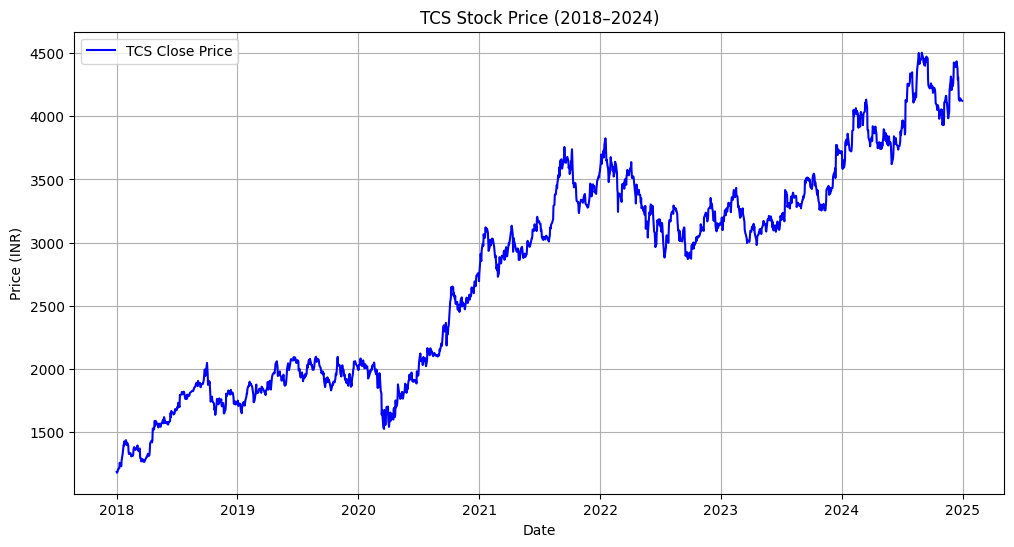

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
tcs.reset_index(inplace=True)
print(tcs.head())
plt.figure(figsize=(12,6))
plt.plot(tcs['Date'],tcs['Close'],label='TCS Close Price',color='blue')
plt.title("TCS Stock Price (2018–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid()
plt.show()


In [9]:
!pip install prophet


In [10]:
print(tcs.head())
print(tcs.columns)


Price        Date        Close         High          Low         Open   Volume
Ticker                  TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
0      2018-01-01  1186.141235  1208.199781  1181.388736  1202.595470  1351760
1      2018-01-02  1179.685181  1196.901692  1174.753386  1192.597537  1920290
2      2018-01-03  1183.024780  1196.632087  1179.684634  1180.043332  1257120
3      2018-01-04  1191.296997  1193.493843  1183.630257  1188.113705   913082
4      2018-01-05  1205.689087  1210.307061  1188.113989  1188.113989  1153706
MultiIndex([(  'Date',       ''),
            ( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])


In [13]:
if not 'Date' in tcs.columns:
    tcs=tcs.reset_index()
print(tcs.columns)
df_prophet=tcs.rename(columns={'Date':'ds','Close':'y'})
if isinstance(df_prophet['y'],pd.Series):
    df_prophet['ds']=pd.to_datetime(df_prophet['ds'])
    df_prophet['y']=pd.to_numeric(df_prophet['y'], errors='coerce')
    df_prophet.dropna(inplace=True)
else:
    print("❌ 'y' is not a valid Series. Check column renaming.")


MultiIndex([(  'Date',       ''),
            ( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
❌ 'y' is not a valid Series. Check column renaming.


/tmp/ipython-input-12-1782758991.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpda575u6o/_hj9zeug.json


ds    datetime64[ns]
y            float64
dtype: object
          ds            y
0 2018-01-01  1186.141235
1 2018-01-02  1179.685181
2 2018-01-03  1183.024780
3 2018-01-04  1191.296997
4 2018-01-05  1205.689087


DEBUG:cmdstanpy:input tempfile: /tmp/tmpda575u6o/1eerw87r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96334', 'data', 'file=/tmp/tmpda575u6o/_hj9zeug.json', 'init=/tmp/tmpda575u6o/1eerw87r.json', 'output', 'file=/tmp/tmpda575u6o/prophet_modelswk7ejne/prophet_model-20250710111102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


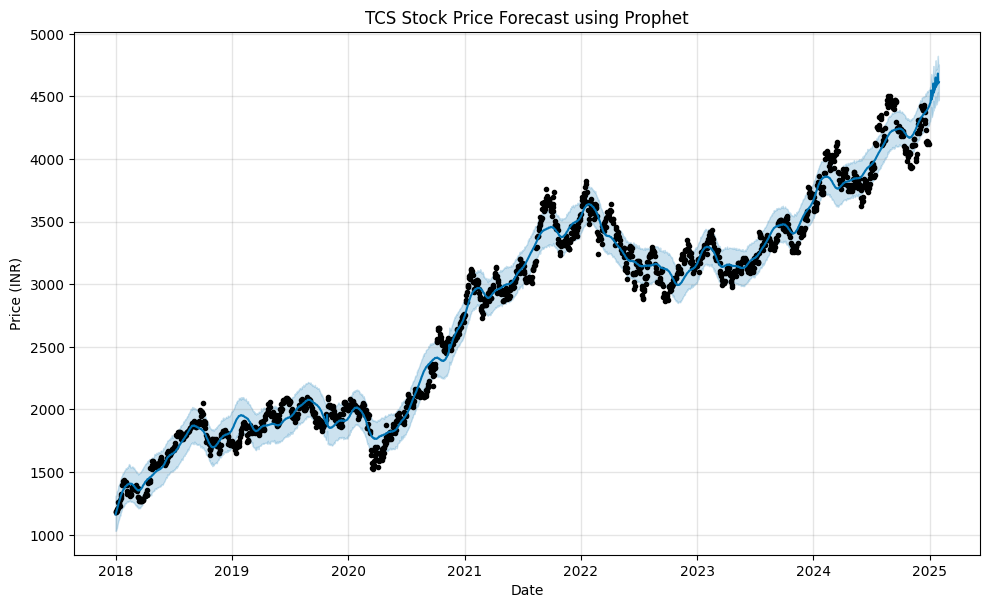

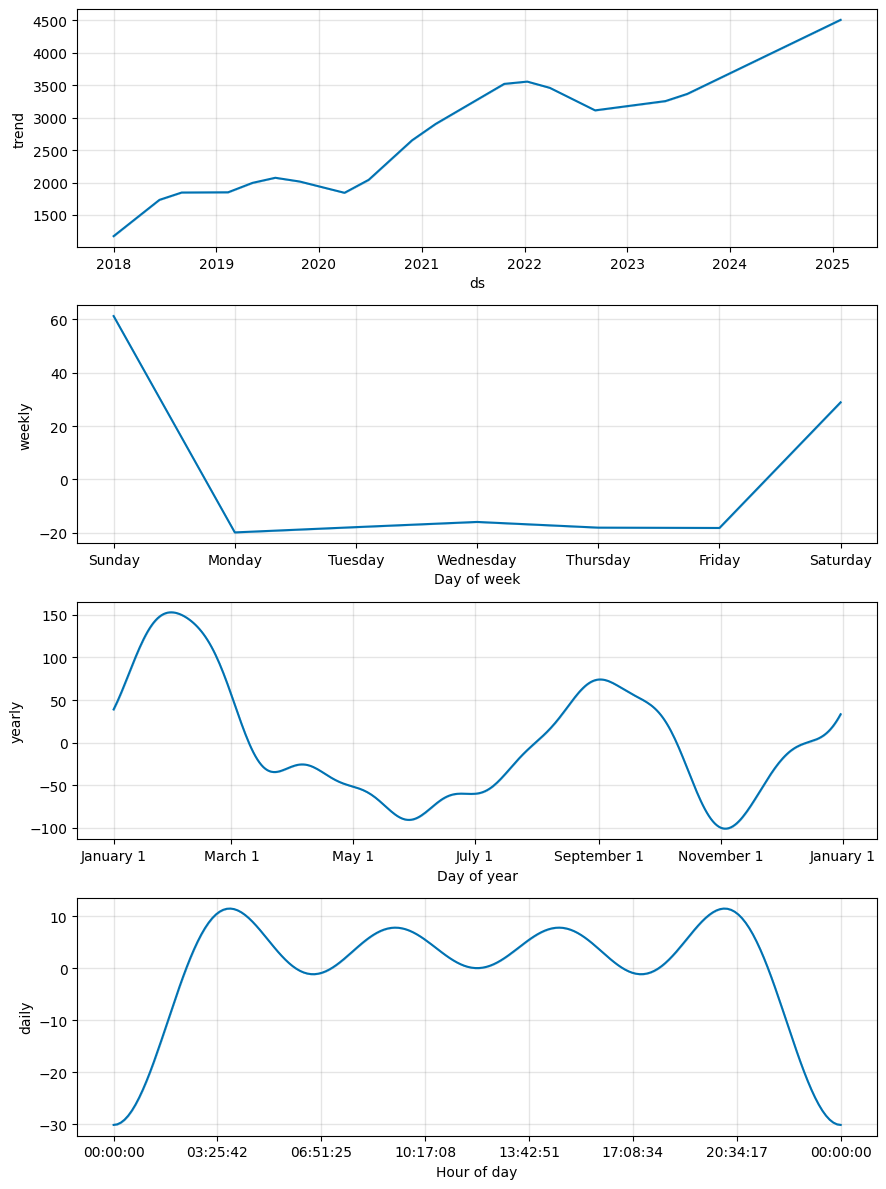

In [12]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
df_prophet=pd.DataFrame()
df_prophet['ds']=tcs.index
df_prophet['y']=tcs['Close'].values
print(df_prophet.dtypes)
print(df_prophet.head())
model=Prophet(daily_seasonality=True)
model.fit(df_prophet)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
fig1=model.plot(forecast)
plt.title("TCS Stock Price Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()
fig2=model.plot_components(forecast)
